# Hastravani Model Training

## Import libraries

In [2]:
import os
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Directories for training and validation data

In [3]:
IMAGE_TRAIN_DIR = '../data/image/train/'
IMAGE_VALIDATION_DIR = '../data/image/validation/'

## Data Augmentation for training images

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

## Only normalization for validation data

In [5]:
valid_datagen = ImageDataGenerator(rescale=1./255)

## Creating generators for training and validation

In [6]:
train_generator = train_datagen.flow_from_directory(
    IMAGE_TRAIN_DIR,
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse'
)

validation_generator = valid_datagen.flow_from_directory(
    IMAGE_VALIDATION_DIR,
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse'
)

Found 2851 images belonging to 26 classes.
Found 2851 images belonging to 26 classes.


## Building the CNN model for image recognition

In [8]:
# Membangun model CNN untuk pengenalan gambar
model = models.Sequential([
    layers.Input(shape=(224, 224, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(train_generator.class_indices), activation='softmax')  # Jumlah kelas
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Melatih model dengan data pelatihan
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10,
    steps_per_epoch=len(train_generator),
    validation_steps=len(validation_generator)
)

Epoch 1/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.0375 - loss: 3.3321

c:\HASTRA_VANI\myenv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


90/90 ━━━━━━━━━━━━━━━━━━━━ 149s 2s/step - accuracy: 0.0376 - loss: 3.3315 - val_accuracy: 0.0677 - val_loss: 3.1950
Epoch 2/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 116s 1s/step - accuracy: 0.0747 - loss: 3.1737 - val_accuracy: 0.1035 - val_loss: 3.0125
Epoch 3/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 880ms/step - accuracy: 0.1227 - loss: 3.0212

KeyboardInterrupt: 

In [7]:
# Evaluasi model
loss, accuracy = model.evaluate(validation_generator)
print(f'Validation Accuracy: {accuracy * 100:.2f}%')

90/90 ━━━━━━━━━━━━━━━━━━━━ 38s 424ms/step - accuracy: 0.9947 - loss: 0.0236
Validation Accuracy: 99.58%


In [1]:
# Plotting Training and Validation Accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Plotting Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

NameError: name 'plt' is not defined

In [8]:
import os

# Create directory if it doesn't exist
save_dir = '../models/models_image'
os.makedirs(save_dir, exist_ok=True)

# Save the model architecture to JSON
model_json = model.to_json()
with open(os.path.join(save_dir, "image_model.json"), "w") as json_file:
    json_file.write(model_json)

# Save the model weights to HDF5
model.save(os.path.join(save_dir, "image_model.h5"))

print("Model saved to disk")


Model saved to disk


## Test Prediction

In [9]:
print(model.input_shape)


(None, 224, 224, 3)


In [29]:
# Function to preprocess the image
def preprocess_image(img_path, target_size):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0  # Normalize the image
    return img, img_array

# Function to predict the image
def predict_image(model, img_path, label_list):
    target_size = (224, 224)  # Define the target size
    img, img_array = preprocess_image(img_path, target_size)

    # Make prediction
    prediction = model.predict(img_array)

    # Get the label with the highest probability
    predicted_class_index = np.argmax(prediction, axis=1)[0]
    predicted_label = label_list[predicted_class_index]

    return img, predicted_label

In [30]:
# Memuat model yang sudah dilatih
model = load_model('../models/models_image/image_model.h5')

In [31]:
# Daftar label kelas
label_list = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']

In [25]:
# Path of the image to be predicted
img_path = '../data/image/train/A/A01.jpg'

# Predict the image
predicted_label = predict_image(model, img_path, label_list)

# Display the prediction result
print(f"Predicted Label: {predicted_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Predicted Label: A


In [26]:
# Path of the image to be predicted
img_path = '../data/image/train/B/B001.jpg'

# Predict the image
predicted_label = predict_image(model, img_path, label_list)

# Display the prediction result
print(f"Predicted Label: {predicted_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Predicted Label: B


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


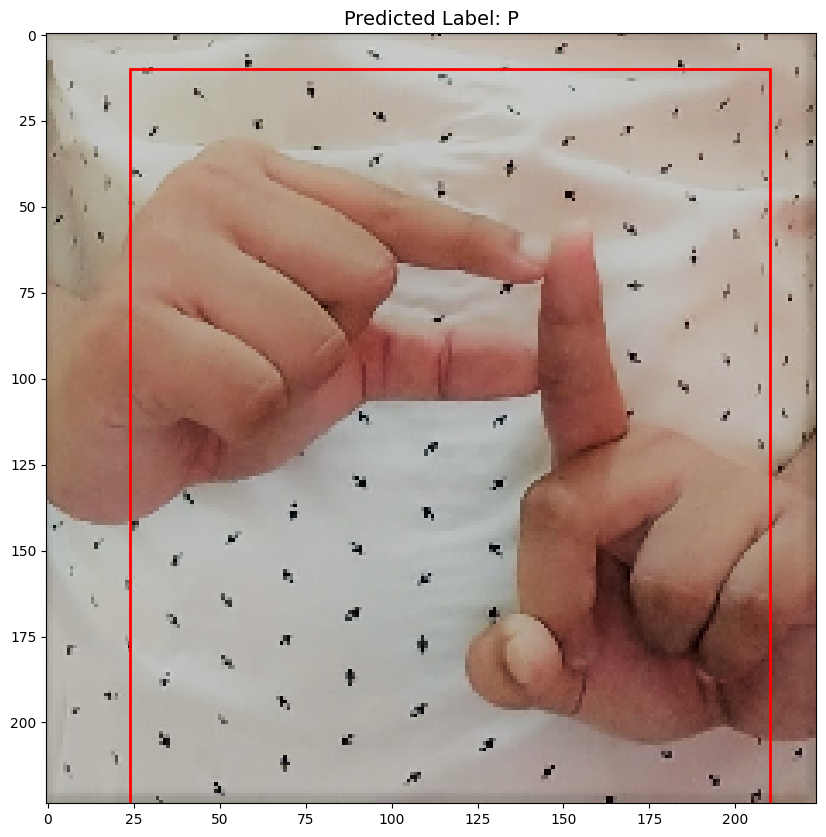

In [43]:
# Path of the image to be predicted
img_path = '../data/image/train/P/p001.jpg'

# Predict the image
img, predicted_label = predict_image(model, img_path, label_list)

# Display the image and label
fig, ax = plt.subplots(1, figsize=(10, 10))
ax.imshow(img)

# Add text for the predicted label
ax.set_title(f'Predicted Label: {predicted_label}', fontsize=14)

# Add a bounding box to the image (example)
# Example coordinates for the bounding box [xmin, ymin, xmax, ymax]
# This could be replaced with results from an object detection model if available.
xmin, ymin, xmax, ymax = 24, 10, 210, 228  # Example bounding box coordinates (replace with actual coordinates)

# Draw the bounding box
rect = plt.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, linewidth=2, edgecolor='r', facecolor='none')
ax.add_patch(rect)

# Show the image
plt.show()